In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# number of cores
P = 16

In [3]:
# Create Empty blocks
m = 128
l = 128
n = 128

In [4]:
def Draw_mat(M, title, colorbar=False):
    global P
    plt.figure(figsize = [5,5])
    
    for i in np.arange(0.5,P-1,1.0):
        plt.axhline(y=i, xmin=-0.5, xmax=P-0.5, linewidth=2, color=(0.5,0.5,0.5))
        plt.axvline(x=i, ymin=-0.5, ymax=P-0.5, linewidth=2, color=(0.5,0.5,0.5))
    plt.imshow(M if colorbar else 1-M, cmap = plt.cm.hot, interpolation = 'nearest')
    
    plt.xticks(range(0,M.shape[1],4))
    plt.yticks(range(0,M.shape[0],4))
    
    if colorbar:
        plt.colorbar()
    plt.title(title)
    
    plt.show()
                

In [5]:
from HCube import HyperCube as HCB

In [6]:
HCube1 = HCB(P,m,l,n)
HCube1.Shade_from_HBC('HCube_example/P16/P16_Fox2_2x', separator=' ')

In [7]:
PA,PB = HCube1.Calculate_Potentials()

In [8]:
HCube1.whole_area_A[:,:,0].shape

(128, 128)

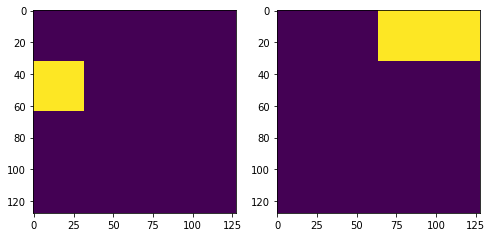

In [9]:
plt.figure(figsize=[8,8])
plt.subplot(1,2,1)
plt.imshow(HCube1.buffer_area_A[:,:,4])
plt.subplot(1,2,2)
plt.imshow(HCube1.buffer_area_B[:,:,4])
plt.show()

In [10]:
Linmap_A,Linmap_B = HCube1.Get_Linprog_Map()

In [11]:
HCube1.Check_Area()

In [12]:
HCube1.Col_dict_A

{(-12, 16): 1024,
 (-11, 15): 1024,
 (-10, 14): 1024,
 (-9, 13): 1024,
 (-4, 8): 1024,
 (-3, 7): 1024,
 (-2, 6): 1024,
 (-1, 5): 1024,
 (1, -5): 1024,
 (2, -6): 1024,
 (3, -7): 1024,
 (4, -8): 1024,
 (9, -13): 1024,
 (10, -14): 1024,
 (11, -15): 1024,
 (12, -16): 1024}

In [13]:
Mat_A = pd.DataFrame(
    data = [
        Linmap_A.map,
        Linmap_A.reciever,
        list(Linmap_A.length),
        list(Linmap_A.area),
        list(Linmap_A.volume)
    ],
    index = ['Source','Reciever','length','area','volume'])

In [14]:
Mat_A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Source,[0],[4],[8],[12],[1],[5],[9],[13],[2],[6],[10],[14],[3],[7],[11],[15]
Reciever,[4],[0],[12],[8],[5],[1],[13],[9],[6],[2],[14],[10],[7],[3],[15],[11]
length,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
area,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
volume,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048


In [15]:
Mat_B = pd.DataFrame(
    data = [
        Linmap_B.map,
        Linmap_B.reciever,
        list(Linmap_B.length),
        list(Linmap_B.area),
        list(Linmap_B.volume)
    ],
    index = ['Source','Reciever','length','area','volume'])

In [16]:
Mat_B

,0,1,2,3,4,5,6,7
Source,"[0, 2]","[4, 6]","[1, 3]","[5, 7]","[8, 10]","[12, 14]","[9, 11]","[13, 15]"
Reciever,"[1, 3]","[5, 7]","[0, 2]","[4, 6]","[9, 11]","[13, 15]","[8, 10]","[12, 14]"
length,4,4,4,4,4,4,4,4
area,2048,2048,2048,2048,2048,2048,2048,2048
volume,8192,8192,8192,8192,8192,8192,8192,8192


In [17]:
Mat_B[1].loc['Reciever']

[5, 7]

# get cycles

In [18]:
def add_ring(Ring_Mat, members, area):
    global P
    ring = np.zeros(P,dtype='int32')
    for m in members:
        ring[m] = 1
    ring = tuple(ring)
    Ring_Mat[ring] = area
        

In [19]:
def MergeRings(Frame):
    rings = {}
    col = 0
    for s in Frame.loc['Source']:
        if len(Frame[col].loc['Reciever']) > 0:
            if len(s) == 1:    # single source
                add_ring(rings, s+Frame[col].loc['Reciever'], Frame[col].loc['area'])
            elif len(s) > 1:
                for i in s:
                    
            
        col += 1
        
    return rings

In [20]:
Rings_A = (MergeRings(Mat_A))
R_A = []
for (r,a) in Rings_A.items():
    R_A.append(np.array(r)*a)

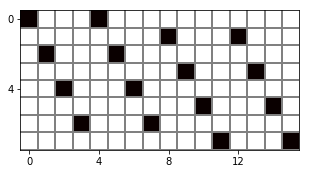

In [21]:
Draw_mat(np.array(R_A),title='')

In [22]:
Rings_B = (MergeRings(Mat_B))
R_B = []
for (r,a) in Rings_B.items():
    R_B.append(np.array(r)*a)

In [27]:
row = 0
R_B = np.zeros([8,P],dtype='int32')
for j in [
    [0,1],[2,3],[4,5],[6,7],
    [8,9],[10,11],[12,13],[14,15]
]:
    for i in j:
        R_B[row][i] = 1
        
    row += 1

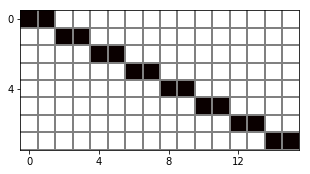

In [29]:
Draw_mat(np.array(R_B),title='')